In [218]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [219]:
data = pd.read_csv('train.csv')

data

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
...,...,...,...,...,...,...,...,...,...,...,...,...
244763,72705211,TEACHER OF SCIENCE,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244764,72705212,TEACHER OF BUSINESS STUDIES AND ICT,Position: Qualified Teacher or NQT Subject/Spe...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244765,72705213,ENGLISH TEACHER,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244766,72705216,SUPPLY TEACHERS,Position: Qualified Teacher Subject/Specialism...,Wiltshire,Wiltshire,NaN,contract,NaN,Teaching Jobs,450 to 500 per week,22800,hays.co.uk


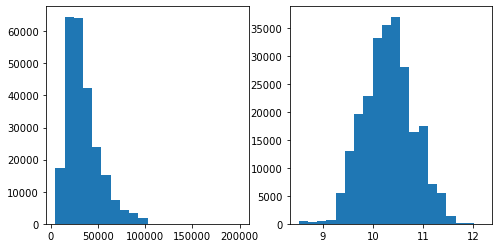

In [220]:
data['Log1pSalary'] = np.log1p(data['SalaryNormalized']).astype('float32')

plt.figure(figsize=[8, 4])
plt.subplot(1, 2, 1)
plt.hist(data["SalaryNormalized"], bins=20);

plt.subplot(1, 2, 2)
plt.hist(data['Log1pSalary'], bins=20);

In [221]:
data.drop(columns=['Title', 'FullDescription', 'LocationRaw', 'SalaryRaw', 'SourceName', 'SalaryNormalized', 'Id'], inplace=True)

In [222]:
data.fillna('Other', inplace=True)

In [223]:
data.LocationNormalized = data.LocationNormalized.str.replace('NaN','Other')
data.ContractType = data.ContractType.str.replace('NaN','Other')
data.ContractTime = data.ContractTime.str.replace('NaN','Other')
data.Company = data.Company.str.replace('NaN','Other')
data.Category = data.Category.str.replace('NaN','Other')

In [224]:
from collections import Counter

top_LocationNormalized = set(list(zip(*Counter(data.LocationNormalized).most_common(300)))[0])
top_Company = set(list(zip(*Counter(data.Company).most_common(300)))[0]) 

data.LocationNormalized = data.LocationNormalized.apply(lambda x: x if x in top_LocationNormalized else 'Other')
data.Company = data.Company.apply(lambda x: x if x in top_Company else 'Other')

In [225]:
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(data, test_size=0.2, random_state=42)
data_train.index     = range(len(data_train))
data_val.index       = range(len(data_val))

print("Train size = ", len(data_train))
print("Validation size = ", len(data_val))

Train size =  195814
Validation size =  48954


In [226]:
X_train, y_train = data_train.iloc[:, :-1], data_train.iloc[:, -1].values
X_val, y_val     = data_val.iloc[:, :-1], data_val.iloc[:, -1].values

In [227]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer(sparse=False)

vectorizer.fit(X_train.apply(dict, axis=1))

DictVectorizer(sparse=False)

In [228]:
X_train_transformed = vectorizer.transform(X_train.apply(dict, axis=1))
X_val_transformed   = vectorizer.transform(X_val.apply(dict, axis=1))

In [229]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_transformed, y_train)

LinearRegression()

In [230]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_val_transformed)

mean_absolute_error(y_pred, y_val)

0.3098743351406729

In [231]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4)

tree.fit(X_train_transformed, y_train)

DecisionTreeRegressor(max_depth=4)

In [232]:
y_pred = tree.predict(X_val_transformed)

mean_absolute_error(y_pred, y_val)

0.354336557122589